<a href="https://colab.research.google.com/github/Tvorozh0k/ssu-ml-course/blob/main/1_exploratory_data_analysis_and_preprocessing/ML_Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подключение библиотек

In [ ]:
#@title Подключение и настройка библиотеки Pandas

import pandas as pd

from google.colab import drive
from google.colab import data_table
from google.colab.data_table import DataTable

DataTable.num_rows_per_page = 25
data_table.enable_dataframe_formatter()

In [ ]:
#@title Подключение графической библиотеки Plotly

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
#@title Подключение графической библиотеки Matplotlib

from matplotlib import pyplot as plt

In [ ]:
#@title Подключение библиотеки NumPy

import numpy as np

In [ ]:
#@title Подключение библиотеки Sklearn

from sklearn.preprocessing import MinMaxScaler, Stand

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import classification_report

from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

## Загрузка датасета

In [ ]:
#@title Датасет

df = pd.read_csv('https://raw.githubusercontent.com/Tvorozh0k/Plotly_datasets/main/penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [ ]:
#@title Информация о признаках

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Признаки

### Species - категориальный признак (виды пингвинов)

In [ ]:
#@title Информация

df['species'].describe()

count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object

In [ ]:
#@title Пропуски

df['species'].isna().sum()

0

In [ ]:
#@title Значения

df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
#@title Гистограмма

fig = px.histogram(df, x='species', color='species')
fig.show()

In [ ]:
#@title Species и Sex

fig = px.histogram(df.dropna(), x='species', color='sex', barmode='group')
fig.show()

> **Вывод:** пол почти никак не зависит от вида

### Island - категориальный признак (остров, где живет пингвин)

In [ ]:
#@title Информация

df['island'].describe()

count        344
unique         3
top       Biscoe
freq         168
Name: island, dtype: object

In [ ]:
#@title Пропуски

df['island'].isna().sum()

0

In [ ]:
#@title Значения

df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [ ]:
#@title Гистограмма

fig = px.histogram(df, x='island', color='island')
fig.show()

In [ ]:
#@title Island и Sex

fig = px.histogram(df.dropna(), x='island', color='sex', barmode='group')
fig.show()

> **Вывод:** пол почти никак не зависит от острова, нак котором живет пингвин

In [ ]:
#@title Species и Island

fig = px.histogram(df.dropna(), x='species', color='island', barmode='group')
fig.show()

### Bill length - числовой признак (длина клюва)

In [ ]:
#@title Пропуски

df['bill_length_mm'].isna().sum()

2

In [ ]:
#@title Информация

df['bill_length_mm'].describe()

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64

In [ ]:
#@title Гистограмма

fig = px.histogram(df.dropna(), x='bill_length_mm', color='sex', marginal='box', barmode='overlay')
fig.show()

In [ ]:
#@title Bill length и Sex

for x in ['Adelie', 'Gentoo', 'Chinstrap']:
    data = df.dropna()[df.dropna()['species'] == x]

    fig = px.histogram(data, x='bill_length_mm', color='sex', barmode='overlay', marginal='rug', title=x)
    fig.show()

> **Вывод:** нелинейная зависимость относительно пола и длины клюва, НО линейная по разделению на виды

### Bill depth - числовой признак (глубина клюва)

In [ ]:
#@title Пропуски

df['bill_depth_mm'].isna().sum()

2

In [ ]:
#@title Контрольные значения

df['bill_depth_mm'].describe()

count    342.000000
mean      17.151170
std        1.974793
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: bill_depth_mm, dtype: float64

In [ ]:
#@title Гистограмма

fig = px.histogram(df.dropna(), x='bill_depth_mm', color='sex', marginal='box')
fig.show()

In [ ]:
#@title Bill depth и Sex

for x in ['Adelie', 'Gentoo', 'Chinstrap']:
    data = df.dropna()[df.dropna()['species'] == x]

    fig = px.histogram(data, x='bill_depth_mm', color='sex', barmode='overlay', marginal='rug', title=x)
    fig.show()

> **Вывод:** нелинейная зависимость относительно пола и глубины клюва, НО линейная по разделению на виды

### Flipper length - числовой признак (длина крыла)

In [ ]:
#@title Пропуски

df['flipper_length_mm'].isna().sum()

2

In [ ]:
#@title Информация

df['flipper_length_mm'].describe()

count    342.000000
mean     200.915205
std       14.061714
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

In [ ]:
#@title Гистограмма

fig = px.histogram(df.dropna(), x='flipper_length_mm',  color='sex', marginal='box')
fig.show()

In [ ]:
#@title Flipper length и Sex

for x in ['Adelie', 'Gentoo', 'Chinstrap']:
    data = df.dropna()[df.dropna()['species'] == x]

    fig = px.histogram(data, x='flipper_length_mm', color='sex', barmode='overlay', marginal='rug', title=x)
    fig.show()

> **Вывод:** нелинейная зависимость относительно пола и длины крыла, НО линейная по разделению на виды

### Body mass - числовой признак (масса тела)

In [ ]:
#@title Пропуски

df['body_mass_g'].isna().sum()

2

In [ ]:
#@title Информация

df['body_mass_g'].describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [ ]:
#@title Гистограмма

fig = px.histogram(df.dropna(), x='body_mass_g', color='sex', marginal='box')
fig.show()

In [ ]:
#@title Body mass и Sex

for x in ['Adelie', 'Gentoo', 'Chinstrap']:
    data = df.dropna()[df.dropna()['species'] == x]

    fig = px.histogram(data, x='body_mass_g', color='sex', barmode='overlay', marginal='rug', title=x)
    fig.show()

> **Вывод:** нелинейная зависимость относительно пола и массы тела, НО линейная по разделению на виды

### Sex - бинарный признак (пол)

In [ ]:
#@title Информация

df['sex'].describe()

count      333
unique       2
top       male
freq       168
Name: sex, dtype: object

In [ ]:
#@title Пропуски

df['sex'].isna().sum()

11

In [ ]:
#@title Значения

df['sex'].value_counts()

male      168
female    165
Name: sex, dtype: int64

In [ ]:
#@title Гистограмма

fig = px.histogram(df[df['sex'].notna()], x='sex', color='sex')
fig.show()

## Пропуски (удаление)

In [ ]:
#@title Все строки с пропусками

df[df.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Две строки датасета имеют 5 пропусков (индексы: 3 и 271). Лучше всего из датасета их удалить

In [ ]:
#@title Удаляем строки с большим количеством пропусков

df = df.drop(index=[3, 271])
df[df.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Как один из вариантов заполнения пропусков - заменить NaN на моду (male). Придумаем другой способ...

## Нормализация



Есть два способа нормализации признаков. Для дальнейшего удобства будем пользоваться следующим способом нормализации:

$$ x_j' = \frac{x_j - \min}{\max - \min} $$

In [ ]:
#@title Нормализация при помощи Sklearn

data = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

scaler = MinMaxScaler().fit(data)
scale_data = scaler.transform(data)

df['bill_length_mm'] = scale_data[:,0]
df['bill_depth_mm'] = scale_data[:,1]
df['flipper_length_mm'] = scale_data[:,2]
df['body_mass_g'] = scale_data[:,3]
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,female
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,female
5,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,0.861818,0.797619,0.593220,0.361111,male
340,Chinstrap,Dream,0.414545,0.595238,0.508475,0.194444,female
341,Chinstrap,Dream,0.636364,0.607143,0.355932,0.298611,male
342,Chinstrap,Dream,0.680000,0.702381,0.644068,0.388889,male


In [ ]:
#@title Bill length
fig = px.histogram(df.dropna(), x='bill_length_mm', color='sex', marginal='box')
fig.show()

In [ ]:
#@title Bill depth
fig = px.histogram(df.dropna(), x='bill_depth_mm', color='sex', marginal='box')
fig.show()

In [ ]:
#@title Flipper length
fig = px.histogram(df.dropna(), x='flipper_length_mm', color='sex', marginal='box')
fig.show()

In [ ]:
#@title Body mass
fig = px.histogram(df.dropna(), x='body_mass_g', color='sex', marginal='box')
fig.show()

In [ ]:
#@title Выброс 1

df[(df['sex'] == 'female') & (df['bill_depth_mm'] >= 0.875)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
114,Adelie,Biscoe,0.272727,0.904762,0.322034,0.333333,female


In [ ]:
#@title Выброс 2

df[(df['sex'] == 'female') & (df['bill_length_mm'] >= 0.92)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
293,Chinstrap,Dream,0.941818,0.559524,0.152542,0.277778,female


## Пропуски (логистическая регрессия)

In [ ]:
#@title Adelie

data = df.dropna()[df.dropna()['species'] == 'Adelie']

# random_state перемешивает данные в зависимости от значения
clf = LogisticRegression(random_state=42, solver='saga').fit(data[['bill_length_mm', 'bill_depth_mm', 'body_mass_g']], data['sex'])

y_pred = clf.predict(data[['bill_length_mm', 'bill_depth_mm', 'body_mass_g']])
print(classification_report(data['sex'], y_pred))

              precision    recall  f1-score   support

      female       0.91      0.92      0.91        73
        male       0.92      0.90      0.91        73

    accuracy                           0.91       146
   macro avg       0.91      0.91      0.91       146
weighted avg       0.91      0.91      0.91       146



In [ ]:
test = df[df.isna().any(axis=1)][df['species'] == 'Adelie'][['bill_length_mm', 'bill_depth_mm', 'body_mass_g']]
test

<ipython-input-65-fa988bd2f937>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,bill_length_mm,bill_depth_mm,body_mass_g
8,0.072727,0.595238,0.215278
9,0.360000,0.845238,0.430556
10,0.207273,0.476190,0.166667
11,0.207273,0.500000,0.277778
47,0.196364,0.690476,0.076389


In [ ]:
for x in zip(test.index, clf.predict(test)):
    print(x)

(8, 'female')
(9, 'male')
(10, 'female')
(11, 'female')
(47, 'female')


In [ ]:
coef = clf.coef_[0]
coef

array([2.27334331, 2.84609955, 3.55752205])

In [ ]:
clf.intercept_

array([-3.32329032])

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=data[data['sex'] == 'male']['bill_length_mm'],
                   y=data[data['sex'] == 'male']['bill_depth_mm'],
                   z=data[data['sex'] == 'male']['body_mass_g'], name='male', mode='markers'))

fig.add_trace(go.Scatter3d(x=data[data['sex'] == 'female']['bill_length_mm'],
                   y=data[data['sex'] == 'female']['bill_depth_mm'],
                   z=data[data['sex'] == 'female']['body_mass_g'], name='female', mode='markers'))

h = np.arange(0, 1.01, 0.01)
x_range = np.repeat(h, 101)
y_range = x_range.reshape(101, 101).T.reshape(1, -1)[0]
z_range = (-clf.intercept_ - coef[0] * x_range - coef[1] * y_range) / coef[2]

fig.add_trace(go.Mesh3d(x=x_range, y=y_range, z=z_range, name='hyperplane', opacity=0.75))

fig.update_layout(scene=dict(
    xaxis_title='bill_length_mm',
    yaxis_title='bill_depth_mm',
    zaxis_title='body_mass_g'),
    width=600,
    height=600,
    title='Adelie')

fig.show()

In [ ]:
#@title Gentoo

data = df.dropna()[df.dropna()['species'] == 'Gentoo']

# random_state перемешивает данные в зависимости от значения
clf = LogisticRegression(random_state=42, solver='saga', penalty='l1').fit(data[['bill_length_mm', 'bill_depth_mm', 'body_mass_g']], data['sex'])

y_pred = clf.predict(data[['bill_length_mm', 'bill_depth_mm', 'body_mass_g']])
print(classification_report(data['sex'], y_pred))

              precision    recall  f1-score   support

      female       0.95      0.93      0.94        58
        male       0.94      0.95      0.94        61

    accuracy                           0.94       119
   macro avg       0.94      0.94      0.94       119
weighted avg       0.94      0.94      0.94       119



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [ ]:
test = df[df.isna().any(axis=1)][df['species'] == 'Gentoo'][['bill_length_mm', 'bill_depth_mm', 'body_mass_g']]
test

<ipython-input-71-3443edd746b3>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,bill_length_mm,bill_depth_mm,body_mass_g
178,0.450909,0.142857,0.388889
218,0.512727,0.154762,0.541667
256,0.552727,0.083333,0.562500
268,0.450909,0.309524,0.604167


In [ ]:
for x in zip(test.index, clf.predict(test)):
    print(x)

(178, 'female')
(218, 'female')
(256, 'female')
(268, 'female')


In [ ]:
coef = clf.coef_[0]
coef

array([ 0.        ,  6.19756917, 13.04485076])

In [ ]:
clf.intercept_

array([-9.9247508])

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=data[data['sex'] == 'male']['bill_length_mm'],
                   y=data[data['sex'] == 'male']['bill_depth_mm'],
                   z=data[data['sex'] == 'male']['body_mass_g'], name='male', mode='markers'))

fig.add_trace(go.Scatter3d(x=data[data['sex'] == 'female']['bill_length_mm'],
                   y=data[data['sex'] == 'female']['bill_depth_mm'],
                   z=data[data['sex'] == 'female']['body_mass_g'], name='female', mode='markers'))

h = np.arange(0, 1.01, 0.01)
x_range = np.repeat(h, 101)
y_range = x_range.reshape(101, 101).T.reshape(1, -1)[0]
z_range = (-clf.intercept_ - coef[0] * x_range - coef[1] * y_range) / coef[2]

fig.add_trace(go.Mesh3d(x=x_range, y=y_range, z=z_range, name='hyperplane', opacity=0.75))

fig.update_layout(scene=dict(
    xaxis_title='bill_length_mm',
    yaxis_title='bill_depth_mm',
    zaxis_title='body_mass_g'),
    width=600,
    height=600,
    title='Gentoo')

fig.show()

Таким образом, пропуски будут заполнены следующим образом:

<center>
    <table>
        <tr>
            <th> index <th/>
            <th> sex (LR) <th/>
        <tr/>
        <tr>
            <td> 8 <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 9 <td/>
            <td> male <td/>
        <tr/>
        <tr>
            <td> 10 <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 11 <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 47 <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 178 <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 218 <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 256 <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 268 <td/>
            <td> female <td/>
        <tr/>
    <table/>
<center/>

## Преобразование категориальных признаков

Преобразование категориального признака с $m$ различными значениями можно преобразовать в $m$ бинарных признаков - проверок принадлежности каждому из классов (**One-hot** или **dummy-кодирование**)

Функции:

* Pandas: <a href="https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html"> get_dummies </a>
* Sklearn: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder"> OneHotEncoder </a>

In [ ]:
#@title Species

df = pd.get_dummies(df, prefix=['Species'], columns = ['species'], prefix_sep='=')
df

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Species=Adelie,Species=Chinstrap,Species=Gentoo
0,Torgersen,0.254545,0.666667,0.152542,0.291667,male,1,0,0
1,Torgersen,0.269091,0.511905,0.237288,0.305556,female,1,0,0
2,Torgersen,0.298182,0.583333,0.389831,0.152778,female,1,0,0
4,Torgersen,0.167273,0.738095,0.355932,0.208333,female,1,0,0
5,Torgersen,0.261818,0.892857,0.305085,0.263889,male,1,0,0
...,...,...,...,...,...,...,...,...,...
339,Dream,0.861818,0.797619,0.593220,0.361111,male,0,1,0
340,Dream,0.414545,0.595238,0.508475,0.194444,female,0,1,0
341,Dream,0.636364,0.607143,0.355932,0.298611,male,0,1,0
342,Dream,0.680000,0.702381,0.644068,0.388889,male,0,1,0


In [ ]:
#@title Island

df = pd.get_dummies(df, prefix=['Island'], columns = ['island'], prefix_sep='=')
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Species=Adelie,Species=Chinstrap,Species=Gentoo,Island=Biscoe,Island=Dream,Island=Torgersen
0,0.254545,0.666667,0.152542,0.291667,male,1,0,0,0,0,1
1,0.269091,0.511905,0.237288,0.305556,female,1,0,0,0,0,1
2,0.298182,0.583333,0.389831,0.152778,female,1,0,0,0,0,1
4,0.167273,0.738095,0.355932,0.208333,female,1,0,0,0,0,1
5,0.261818,0.892857,0.305085,0.263889,male,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
339,0.861818,0.797619,0.593220,0.361111,male,0,1,0,0,1,0
340,0.414545,0.595238,0.508475,0.194444,female,0,1,0,0,1,0
341,0.636364,0.607143,0.355932,0.298611,male,0,1,0,0,1,0
342,0.680000,0.702381,0.644068,0.388889,male,0,1,0,0,1,0


Для восстановления пропусков в признаке пол будем смотреть на него как на целевой признак бинарной классификации 0-1

In [ ]:
#@title Sex

df['sex'] = df['sex'].replace({'male' : 0, 'female' : 1})
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Species=Adelie,Species=Chinstrap,Species=Gentoo,Island=Biscoe,Island=Dream,Island=Torgersen
0,0.254545,0.666667,0.152542,0.291667,0.0,1,0,0,0,0,1
1,0.269091,0.511905,0.237288,0.305556,1.0,1,0,0,0,0,1
2,0.298182,0.583333,0.389831,0.152778,1.0,1,0,0,0,0,1
4,0.167273,0.738095,0.355932,0.208333,1.0,1,0,0,0,0,1
5,0.261818,0.892857,0.305085,0.263889,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
339,0.861818,0.797619,0.593220,0.361111,0.0,0,1,0,0,1,0
340,0.414545,0.595238,0.508475,0.194444,1.0,0,1,0,0,1,0
341,0.636364,0.607143,0.355932,0.298611,0.0,0,1,0,0,1,0
342,0.680000,0.702381,0.644068,0.388889,0.0,0,1,0,0,1,0


## Пропуски (дерево решений)

In [ ]:
#@title Обучение

data = df.dropna()

clf = DecisionTreeClassifier(random_state=42, max_depth=10).fit(data.drop(columns=['sex']), data['sex'])
y_pred = clf.predict(data.drop(columns=['sex']))
print(classification_report(data['sex'], y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       168
         1.0       1.00      1.00      1.00       165

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



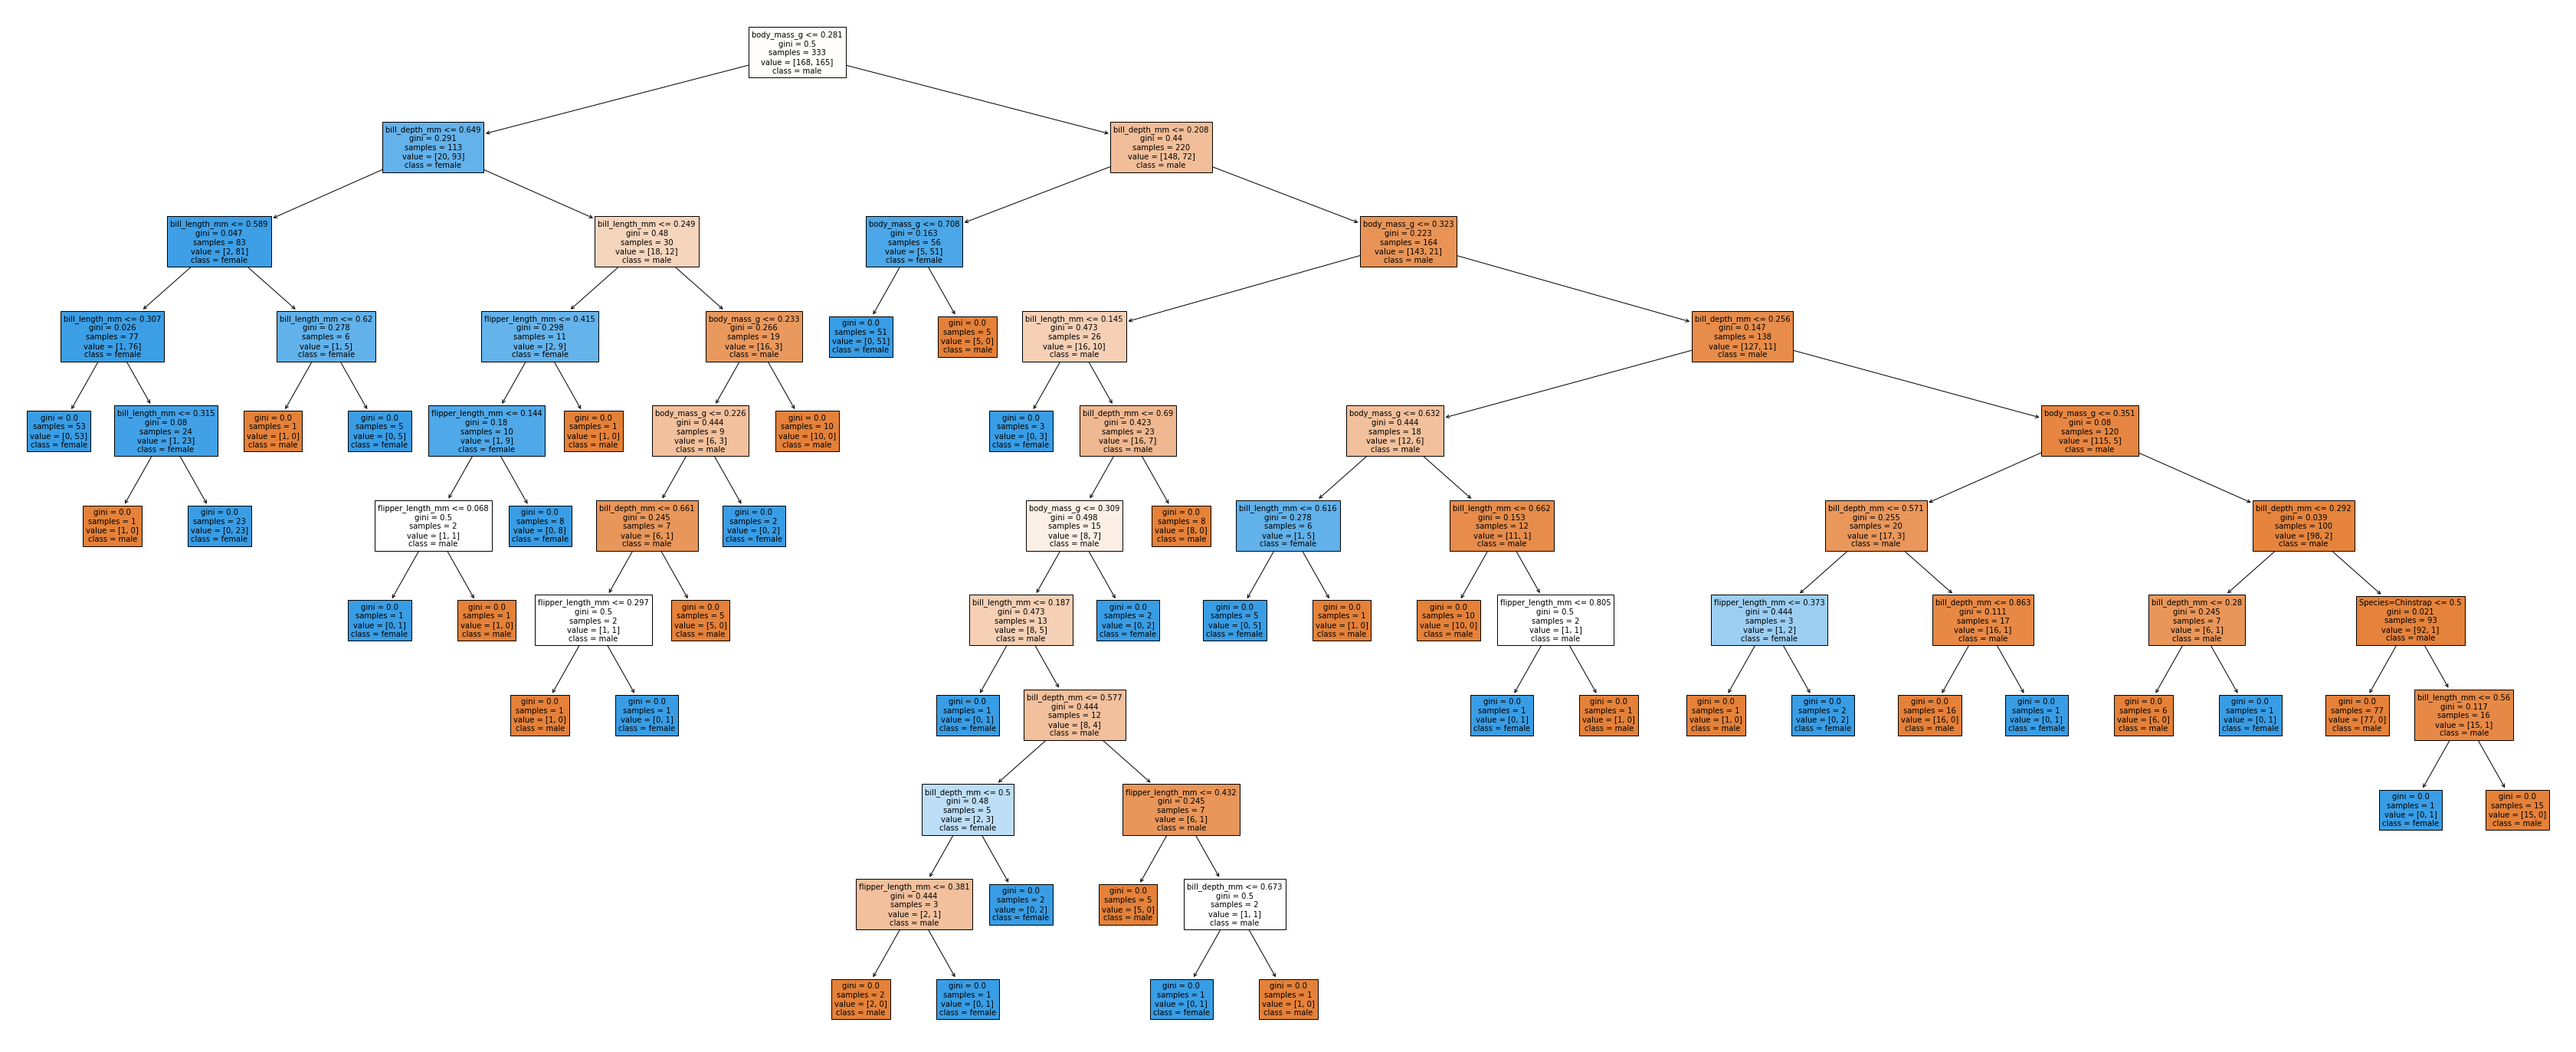

In [ ]:
#@title Визуализация дерева решений

fig = plt.figure(figsize=(60,25))
_ = tree.plot_tree(clf, fontsize=10,
                   feature_names=df.drop(columns=['sex']).columns,
                   class_names=['male', 'female'],
                   filled=True)

plt.savefig('tree_high_dpi', dpi=100)

In [ ]:
#@title Заполнение пропусков

d = dict(zip([7, 8, 9, 10, 46, 177, 217, 255, 267], [8, 9, 10, 11, 47, 178, 218, 256, 268]))

for x in zip([7, 8, 9, 10, 46, 177, 217, 255, 267], clf.predict(df.iloc[[7, 8, 9, 10, 46, 177, 217, 255, 267]].drop(columns=['sex']))):
    print((d[x[0]], 'female' if x[1] == 1 else 'male'))

(8, 'female')
(9, 'male')
(10, 'female')
(11, 'female')
(47, 'male')
(178, 'female')
(218, 'female')
(256, 'female')
(268, 'male')


Таким образом, пропуски будут заполнены следующим образом:

<center>
    <table>
        <tr>
            <th> index <th/>
            <th> sex (LR) <th/>
            <th> sex (DT) <th/>
        <tr/>
        <tr>
            <td> 8 <td/>
            <td> female <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 9 <td/>
            <td> <b>male<b/> <td/>
            <td> <b>male<b/> <td/>
        <tr/>
        <tr>
            <td> 10 <td/>
            <td> female <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 11 <td/>
            <td> female <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 47 <td/>
            <td> female <td/>
            <td> <b>male<b/> <td/>
        <tr/>
        <tr>
            <td> 178 <td/>
            <td> female <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 218 <td/>
            <td> female <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 256 <td/>
            <td> female <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 268 <td/>
            <td> female <td/>
            <td> <b>male<b/> <td/>
        <tr/>
    <table/>
<center/>

## Пропуски (kNN)

In [ ]:
#@title Корреляционная матрица

fig = px.imshow(df.corr(), width=800, height=800, color_continuous_scale=['#f84f31', '#ffffff', '#23c552'], text_auto=True)
fig.show()

In [ ]:
#@title Обучение

neigh = KNeighborsClassifier(weights='distance').fit(df.dropna().drop(columns=['sex']), df.dropna()['sex'])

In [ ]:
#@title Расстояния между объектами

fig = px.imshow(neigh.kneighbors_graph(df.dropna().drop(columns=['sex']), mode='distance').toarray(), color_continuous_scale=['#ffffff', '#000000'])
fig.show()

In [ ]:
#@title Заполнение пропусков

d = dict(zip([7, 8, 9, 10, 46, 177, 217, 255, 267], [8, 9, 10, 11, 47, 178, 218, 256, 268]))

for x in zip([7, 8, 9, 10, 46, 177, 217, 255, 267], neigh.predict(df.iloc[[7, 8, 9, 10, 46, 177, 217, 255, 267]].drop(columns=['sex']))):
    print((d[x[0]], 'female' if x[1] == 1 else 'male'))

(8, 'female')
(9, 'male')
(10, 'female')
(11, 'female')
(47, 'female')
(178, 'female')
(218, 'female')
(256, 'female')
(268, 'male')


<center>
    <table>
        <tr>
            <th> index <th/>
            <th> sex (LR) <th/>
            <th> sex (DT) <th/>
            <th> sex (kNN) <th/>
        <tr/>
        <tr>
            <td> 8 <td/>
            <td> female <td/>
            <td> female <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 9 <td/>
            <td> <b>male<b/> <td/>
            <td> <b>male<b/> <td/>
            <td> <b>male<b/> <td/>
        <tr/>
        <tr>
            <td> 10 <td/>
            <td> female <td/>
            <td> female <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 11 <td/>
            <td> female <td/>
            <td> female <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 47 <td/>
            <td> female <td/>
            <td> <b>male<b/> <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 178 <td/>
            <td> female <td/>
            <td> female <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 218 <td/>
            <td> female <td/>
            <td> female <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 256 <td/>
            <td> female <td/>
            <td> female <td/>
            <td> female <td/>
        <tr/>
        <tr>
            <td> 268 <td/>
            <td> female <td/>
            <td> <b>male<b/> <td/>
            <td> <b>male<b/> <td/>
        <tr/>
    <table/>
<center/>

## Уменьшение размерности (PCA)

In [ ]:
data = df.drop(columns=['sex'])

pca = PCA(n_components=2).fit(data)

df['pca1'] = pca.transform(data)[:,0]
df['pca2'] = pca.transform(data)[:,1]
fig = px.scatter(df.dropna(), x='pca1', y='pca2', color='sex', marginal_x='rug', marginal_y='rug', hover_data=['Species=Adelie', 'Species=Gentoo', 'Species=Chinstrap', 'Island=Biscoe', 'Island=Dream', 'Island=Torgersen'])
fig.show()